# Reto: Explorando el índice de felicidad

## Introducción

El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienester, tomando en cuenta 6 factores:
- Producción económica
- Apoyo social
- Esperanza de vida
- Libertad
- Generosidad
- Ausencia de corrupción

El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas. 

En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.

**Objetivo:**

Realizar un análisis exploratorio de los datos para conocer su estructura y contenido.
Visualizar información relevante en gráficas independientes, superpuestas y conjuntas (subgráficas).
Utilizar varios tipos de gráficos para detectar patrones, tendencias y relaciones entre los datos. 

**Instrucciones:**

Para lograr lo anterior, descarga el archivo **DS_C3SC1_Formatco.docx**, el archivo **Hapiness_report.csv** y el dataframe **Metadata.csv**, y realiza los siguientes pasos:

1. Guarda en un dataframe (**hapiness**) todos los registros del archivo **Hapiness_report.csv**

In [17]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo y guardando el dataframe
happiness = pd.read_csv('Happiness_report.csv')

# Estructura del dataframe
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


2. A partir del dataframe **happiness** obtén otro, **mexico** donde únicamente almacenes la información de México. Haz que la columna **Country or region** quede como índice.

In [18]:
# Definiendo el dataframe con la informacion correspondiente a Mexico
mexico = happiness[happiness['Country or region'] == 'Mexico']

# Columna country or region como indice
mexico.set_index('Country or region',inplace=True)

# Estructura del dataframe mexico
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4. Obtén un histograma del puntaje, **score**, para indentificar el rango o clase más frecuente. Ubica el valor de méxico con una etiqueta de texto.


Text(6.595, 1, 'MEX')

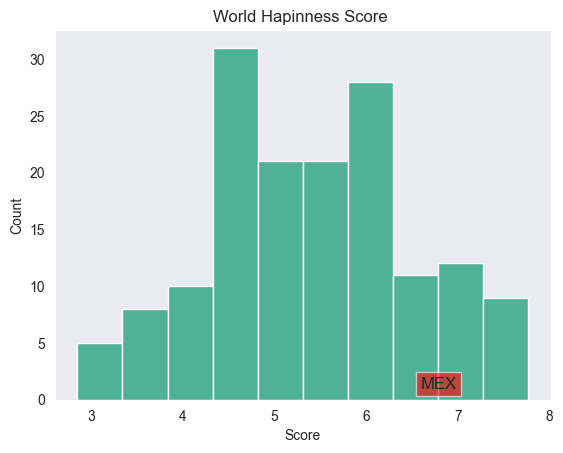

In [19]:
# Definiendo el estilo del grafico
sns.set_style('dark')

# Definiendo la paleta de colores del grafico
sns.set_palette('Dark2')

# Histograma
sns.histplot(x=happiness['Score'],bins=10)
plt.title('World Hapinness Score ')

# Ubicando Mexico
mex_value = mexico['Score'].values[0]

# Etiqueta de Mexico en el histograma
plt.annotate('MEX',xy=(mex_value,0),xytext=(mex_value,1),
             bbox=dict(facecolor='red',alpha=0.6,pad=3),
             fontsize=12)

4. Construye un boxplot para la columna de esperanzad de vida (**Healthy life expectancy**). Ubica el valor de México en la anotación.

Text(1.1, 0.861, 'MEX')

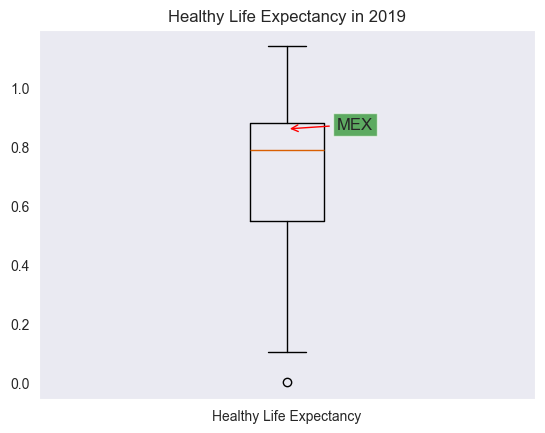

In [20]:
# Boxplot
plt.boxplot(happiness['Healthy life expectancy'].dropna(),
            labels=['Healthy Life Expectancy'])
plt.title('Healthy Life Expectancy in 2019')

# Valor de Mexico
mex_value = mexico['Healthy life expectancy'].values[0]

# Etiqueta de Mexico
plt.annotate('MEX',xy=(1,mex_value),xytext=(1.1,mex_value),
             bbox=dict(facecolor='green',alpha=0.6,pad=3),
             fontsize=12,arrowprops=dict(arrowstyle='->',color='red'))


5. Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.


Text(0.5, 1.0, "Contributions to Mexico's Happiness Score")

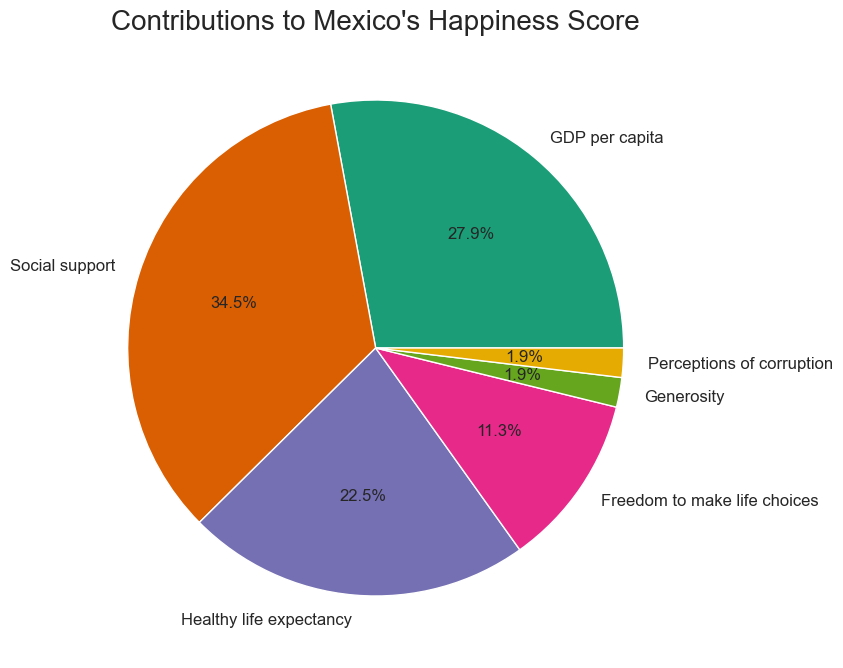

In [21]:
# Definiendo el estilo del grafico
sns.set_style('dark')

# Definiendo la paleta de colores del grafico
sns.set_palette('Dark2')

# Definiendo el dataframe factors
factors = mexico.drop(['Overall rank','Score'],axis=1)
factors = factors.T
factors.index.name = ''
factors.columns = ['Factors']

# Grafico circular

factors.plot.pie(y='Factors',labels=factors.index,legend=False,figsize=(8,10),
                 autopct='%1.1f%%',textprops={'fontsize':12})
plt.ylabel('')
plt.title("Contributions to Mexico's Happiness Score",fontsize=20)


6. Filtra un dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualize en una misma grafica los 6 factores.

In [22]:
# Seleccionando pais mas feliz
most_happy = happiness.loc[happiness['Score'].idxmax(),'Country or region']
print('El país más feliz es',most_happy)
# Seleccionando pais menos feliz
least_happy = happiness.loc[happiness['Score'].idxmin(),'Country or region']
print('El pais menos feliz es', least_happy)

El país más feliz es Finland
El pais menos feliz es South Sudan


In [23]:
# Dataframe con los 5 paises
countries = happiness[happiness['Country or region'].isin([
    'Finland','South Sudan','Mexico','Rwanda','Taiwan'
])]
countries.set_index('Country or region',inplace=True)
countries = countries.drop(['Overall rank','Score'],axis=1)
# Estructura del df
countries

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
Taiwan,1.368,1.430,0.914,0.351,0.242,0.097
Rwanda,0.359,0.711,0.614,0.555,0.217,0.411
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


Text(0.5, 1.0, 'World Happiness Factors Between Countries')

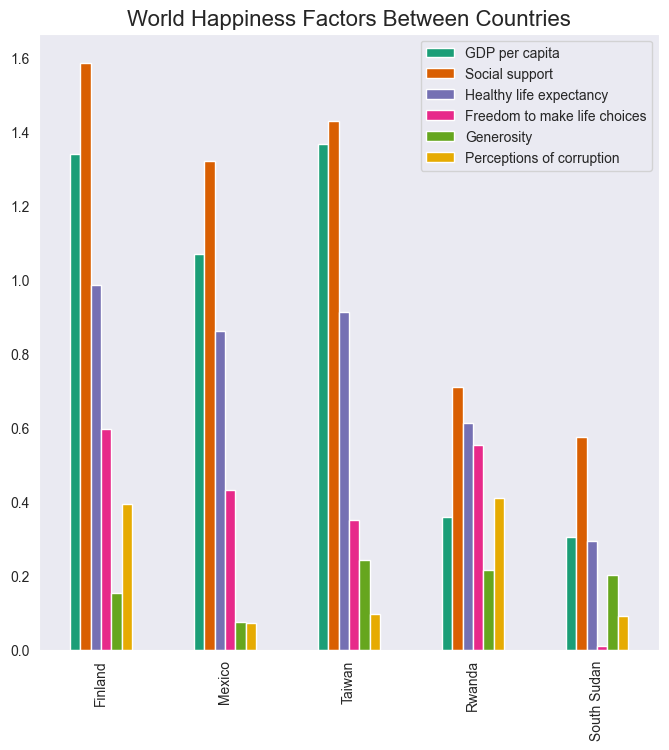

In [24]:
# Paleta de grafico
sns.set_palette('Dark2')

# Grafica
countries.plot.bar(figsize=(8,8))
plt.xlabel('')
plt.title('World Happiness Factors Between Countries',
          fontsize=16)

7. Crea una matriz de subgráficas de 2x3 con scatterplots del puntaje (**score**) versus los 6 factores, para determinar qué factor influye más en la evaluación.


Text(0.5, 1.0, 'Score vs Perceptions of corruption')

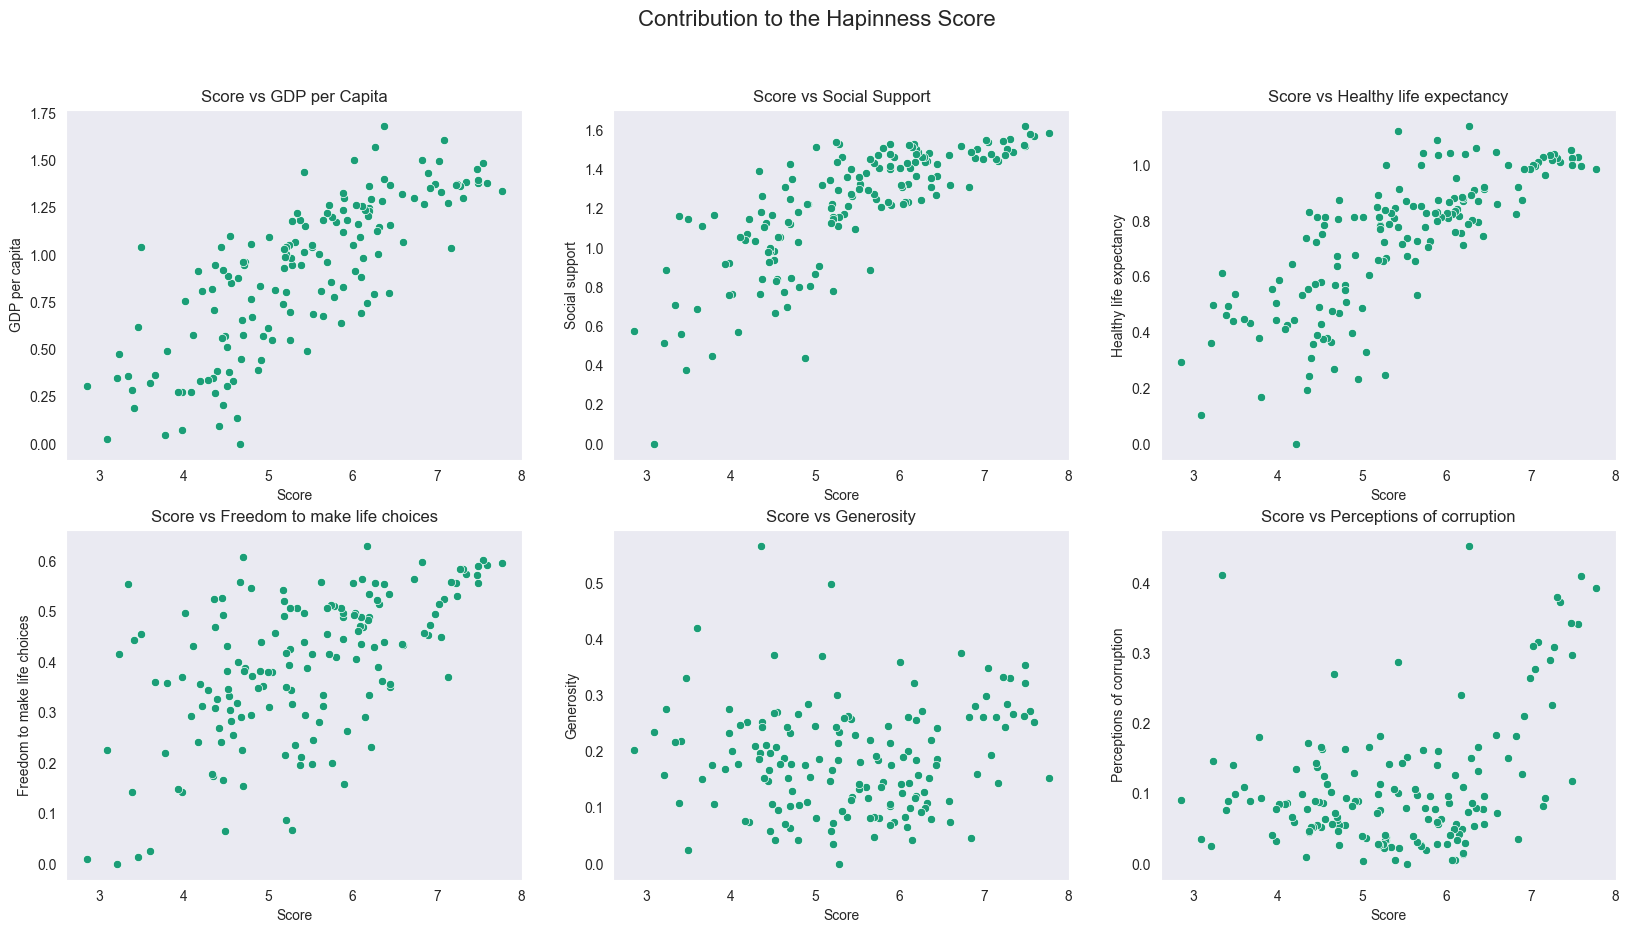

In [25]:
# Paleta de grafico
sns.set_palette('Dark2')

# Definiendo el tamaño de la figura
fig = plt.figure(figsize=(20,10))
fig.suptitle('Contribution to the Hapinness Score',fontsize = 16)

# Primera figura
ax1 = fig.add_subplot(231)
sns.scatterplot(x='Score',y='GDP per capita',data=happiness,ax=ax1)
ax1.set_title('Score vs GDP per Capita')

# Segunda figura
ax2 = fig.add_subplot(232)
sns.scatterplot(x='Score',y='Social support',data=happiness,ax=ax2)
ax2.set_title('Score vs Social Support')

# Tercera figura
ax3 = fig.add_subplot(233)
sns.scatterplot(x='Score',y='Healthy life expectancy',data=happiness,ax=ax3)
ax3.set_title('Score vs Healthy life expectancy')

# Cuarta figura
ax4 = fig.add_subplot(234)
sns.scatterplot(x='Score',y='Freedom to make life choices',data=happiness,ax=ax4)
ax4.set_title('Score vs Freedom to make life choices')

# Quinta figura
ax5 = fig.add_subplot(235)
sns.scatterplot(x='Score',y='Generosity',data=happiness,ax=ax5)
ax5.set_title('Score vs Generosity')

# Sexta figura
ax6 = fig.add_subplot(236)
sns.scatterplot(x='Score',y='Perceptions of corruption',data=happiness,ax=ax6)
ax6.set_title('Score vs Perceptions of corruption')

In [26]:
# Correlacion entre los factores

data_corr = happiness.drop(['Overall rank','Country or region'],axis=1)

# Matriz de correlacion
correlation = data_corr.corr().round(2)
correlation

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.00,0.79,0.78,0.78,0.57,0.08,0.39
GDP per capita,0.79,1.00,0.75,0.84,0.38,-0.08,0.30
Social support,0.78,0.75,1.00,0.72,0.45,-0.05,0.18
Healthy life expectancy,0.78,0.84,0.72,1.00,0.39,-0.03,0.30
Freedom to make life choices,0.57,0.38,0.45,0.39,1.00,0.27,0.44
Generosity,0.08,-0.08,-0.05,-0.03,0.27,1.00,0.33
Perceptions of corruption,0.39,0.30,0.18,0.30,0.44,0.33,1.00


Text(0.5, 1.0, 'Heatmap between Factors')

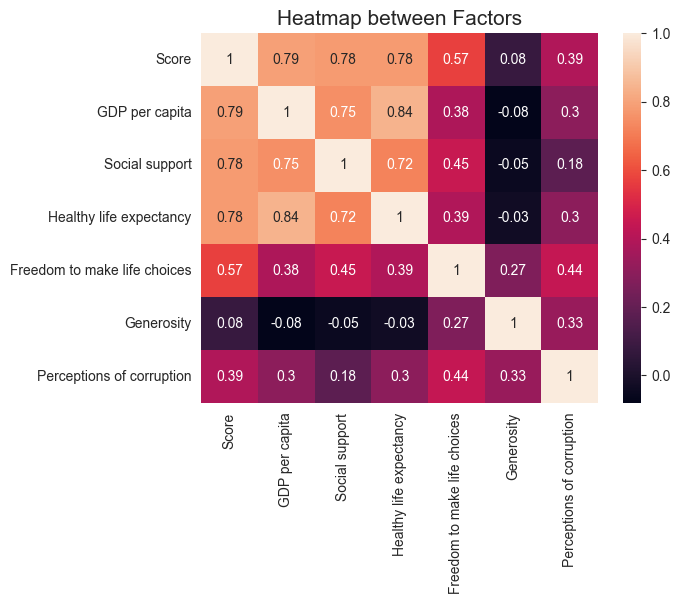

In [27]:
# Heatmap
sns.heatmap(round(data_corr.corr(),2),annot=True)
plt.title('Heatmap between Factors',fontsize=15)

8. Combina con el dataframe **metadata** para graficar la felicidad promedio por región.

In [28]:
# Dataframe Metadata
metadata = pd.read_csv('Metadata.csv')

# Estructura del dataframe
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [29]:
# Dataframe region
region = happiness.merge(metadata,left_on='Country or region',
                         right_on='TableName')
region = region.drop('TableName',axis=1)
# Estructura del dataframe region
region.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...


In [31]:
# Score por region
score_region = region.groupby(['Region'])[['Region','Score']].mean(
    ['Score']
)

# Dataframe resultante
score_region

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'East Asia & Pacific'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Latin America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

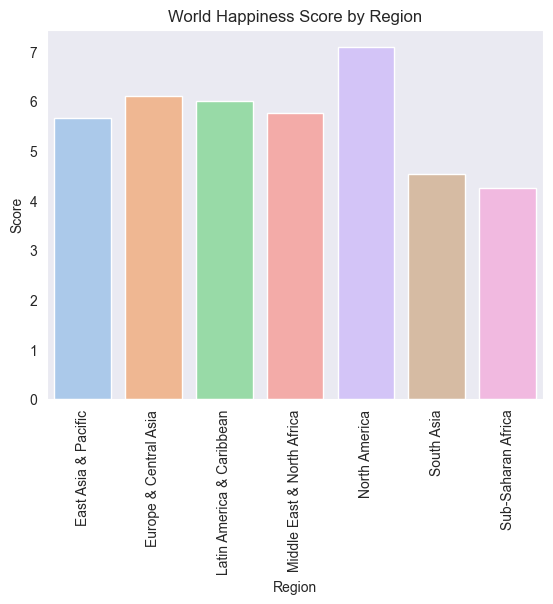

In [43]:
# Paleta del grafico
sns.set_palette('pastel')
# Grafico de la comparacion entre regiones
sns.barplot(x=score_region.index,y='Score',data=score_region,hue='Region')
plt.title('World Happiness Score by Region')
plt.xticks(rotation=90)